In [582]:
# Required imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings module is used to handle warnings
import warnings
warnings.filterwarnings('ignore')

In [583]:
# Display all columns of the dataframe

pd.set_option('display.max_columns', None)

In [584]:
# Read the dataset
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [585]:
# Data Dictionary
# - instant: record index
# - dteday : date
# - season : season (1:spring, 2:summer, 3:fall, 4:winter)
# - yr : year (0: 2018, 1:2019)
# - mnth : month ( 1 to 12)
# - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit : 
# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : temperature in Celsius
# - atemp: feeling temperature in Celsius
# - hum: humidity
# - windspeed: wind speed
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered
data.shape

(730, 16)

In [586]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [587]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [588]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [589]:
### Insights gathered so far
# - There are 730 rows and 16 columns in the dataset.
# - dteday is the only column with object datatype.
# - There are no null values in the dataset.
# - mean temp is 20.319259

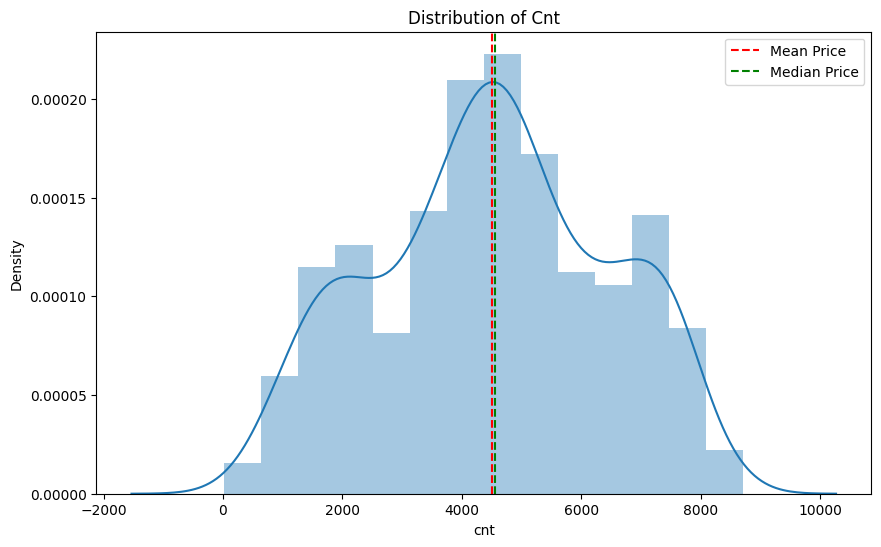

In [590]:
# Distribution of the target variable i.e. price
plt.figure(figsize=(10, 6))
sns.distplot(data['cnt'])
plt.axvline(data['cnt'].mean(), color='r', linestyle='--', label='Mean Price')
plt.axvline(data['cnt'].median(), color='g', linestyle='--', label='Median Price')
plt.legend()
plt.title('Distribution of Cnt')
plt.show()

In [591]:
# Price column has normal distrbution. it can be seen from above chart.

In [592]:
data.cnt.skew()

# Thumb rule for skewness
# If the skewness is between -0.5 to 0.5 then the data is fairly symmetrical
# If the skewness is between -1 to -0.5 or 0.5 to 1 then the data is moderately skewed
# If the skewness is less than -1 or greater than 1 then the data is highly skewed

-0.04958060487648213

In [593]:
# Data cleanup

# Drop not required columns
# instant is an id column so dropping it.
# as we have month and year column we dont need dteday column so dropping it.
# casual and registered are user classification which will not contribute in our analysis so dropping them.
# we have two columns temp and atemp which are highly correlated so we can drop on of them.
data.drop(['casual', 'registered','instant', 'dteday','atemp'], axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [594]:
# season, mnth, weekday and weathersit have integer values. Need to convert them to categorical variables.

In [595]:
def replace_season(a,b): # a is the old value and b is the new value
    data.season.replace(a,b, inplace=True) 

replace_season(1, 'spring')
replace_season(2, 'summer')
replace_season(3, 'fall')
replace_season(4, 'winter')

In [596]:
def replace_month(a,b): # a is the old value and b is the new value
    data.mnth.replace(a,b, inplace=True)

replace_month(1, 'Jan')
replace_month(2, 'Feb')
replace_month(3, 'Mar')
replace_month(4, 'Apr')
replace_month(5, 'May')
replace_month(6, 'Jun')
replace_month(7, 'Jul')
replace_month(8, 'Aug')
replace_month(9, 'Sep')
replace_month(10, 'Oct')
replace_month(11, 'Nov')
replace_month(12, 'Dec')

In [597]:
def replace_weekday(a,b): # a is the old value and b is the new value
    data.weekday.replace(a,b, inplace=True)

replace_weekday(0, 'Sun')
replace_weekday(1, 'Mon')
replace_weekday(2, 'Tues')
replace_weekday(3, 'Wed')
replace_weekday(4, 'Thur')
replace_weekday(5, 'Fri')
replace_weekday(6, 'Sat')

In [598]:
def replace_weathersit(a,b): # a is the old value and b is the new value
    data.weathersit.replace(a,b, inplace=True)

replace_weathersit(1, 'Clear')
replace_weathersit(2, 'Mist')
replace_weathersit(3, 'Light Snow')
replace_weathersit(4, 'Heavy Rain')

In [599]:
data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [600]:
# we can see there are less records where holiday is equal to 1.
print(len(data[data['holiday'] == 1].value_counts()))
print(len(data[data['holiday'] == 0].value_counts()))

21
709


In [601]:
def boxplot(x,fig):
    plt.subplot(5,2,fig)
    sns.boxplot(data, x=x, y = "cnt", palette="plasma")
    plt.xticks(rotation = 45)
    #plt.scatter(data[x],data['cnt'])
    plt.title(x+' vs Cnt')
    plt.ylabel('Cnt')
    plt.xlabel(x)

def countplot(x, fig):
    #plt.subplot(141)
    sns.countplot(data, x = x)
    plt.xticks(rotation = 45)
    plt.title('holiday')
    

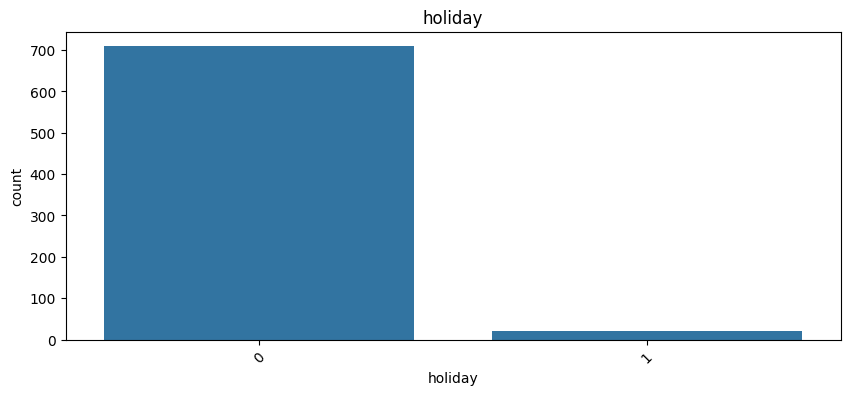

In [602]:
# plot holiday in chart to see the count of records.
# it means maximum booking for bikes happens on non-holiday days.
plt.figure(figsize = [10,4])
countplot('holiday',1)
plt.show()

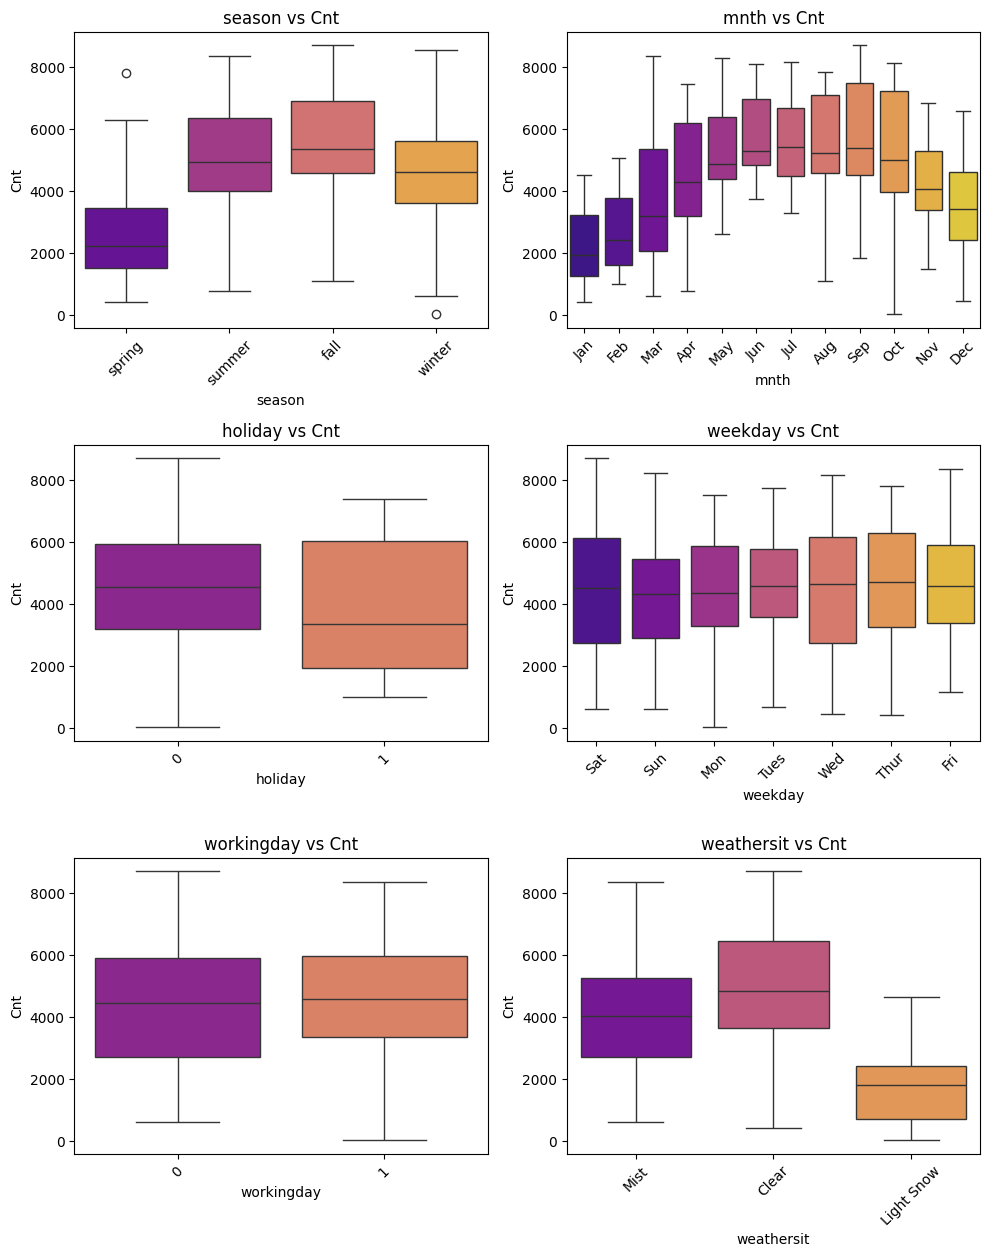

In [603]:
plt.figure(figsize=(10,20))

boxplot('season', 1)
boxplot('mnth', 2)
boxplot('holiday', 3)
boxplot('weekday', 4)
boxplot('workingday', 5)
boxplot('weathersit', 6)

plt.tight_layout()

In [604]:
# Insights from above chart
# From the first chart we can see that the Fall season has the highest demand for rental bikes.
# Demand increases each month from Jan to June. Highest demand is in month of September. Demand starts decreasing after September month.
# On a holiday, demand decreases.
# Can't conclude anything based on weekday chart and working day chart.
# Demand is more when whether is Clear. It can be seen from last chart.

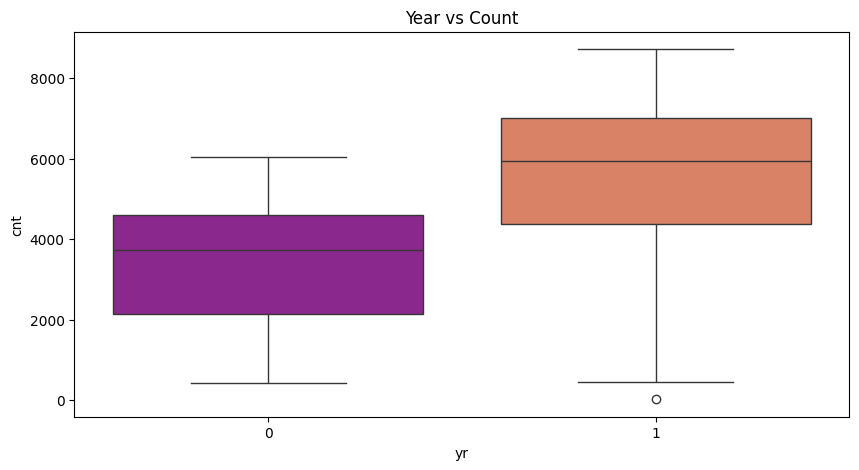

In [605]:
plt.figure(figsize=(10, 5))
plt.title('Year vs Count')
sns.boxplot(data=data, x='yr', y='cnt', palette="plasma")
plt.show()

In [606]:
# from above we can see the demand for rental bikes has also increased each year from 2018 to 2019.

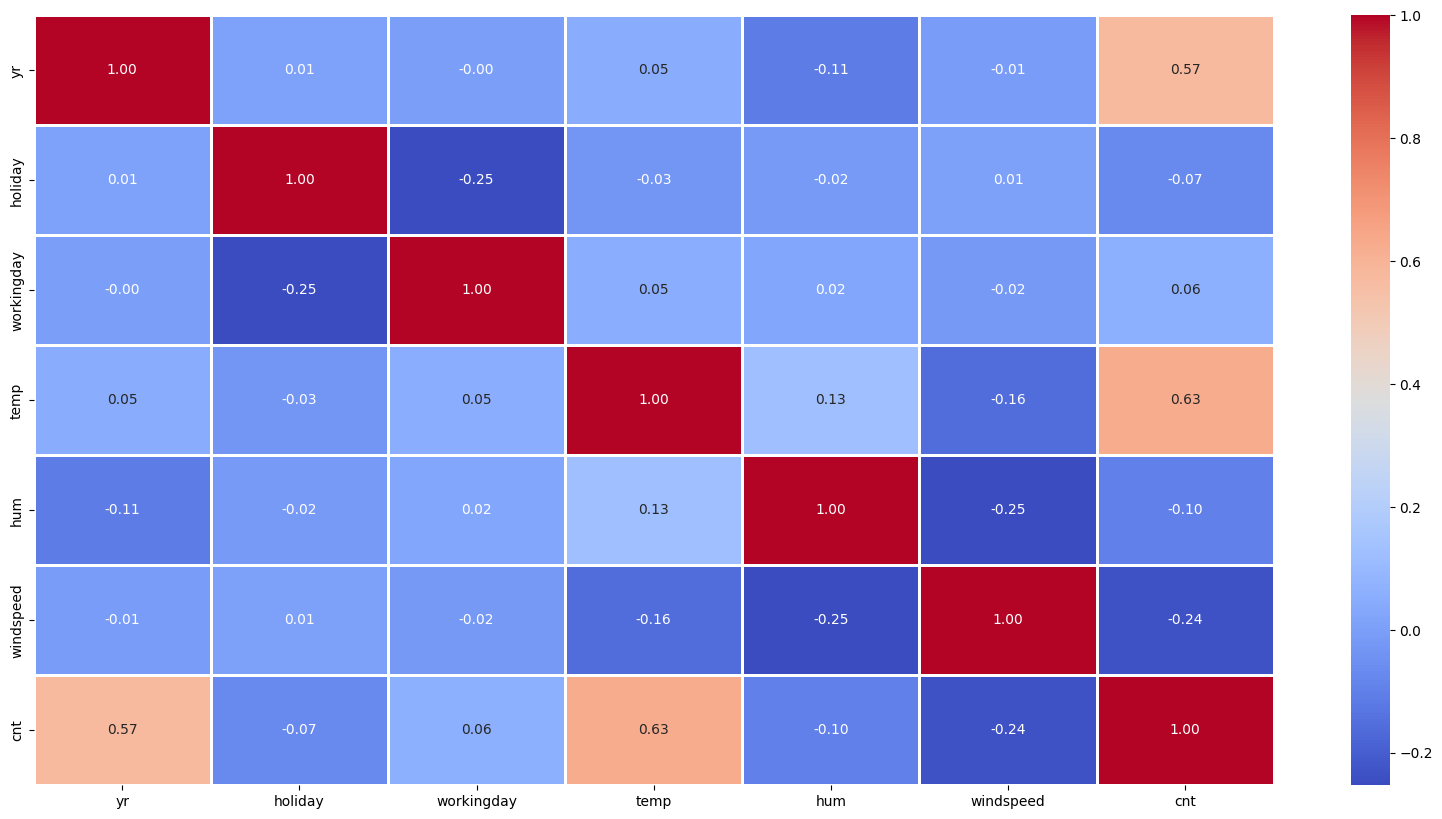

In [607]:
# The output shows the correlation between all the numeric variables
# It is almost impossible to read this correlation matrix and understand the correlation between the variables
# Hence, we will plot a heatmap to visualize the correlation between the variables in a better way
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [608]:
# cnt is positively correlated to temp variable and negatively correlated to windspeed and humidity.
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [609]:
# create dummy variables 
data = pd.get_dummies(data,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [610]:
data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [611]:
data.shape
# now we have 730 rows and 30 columns.

(730, 29)

In [612]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    int32  
 8   season_summer          730 non-null    int32  
 9   season_winter          730 non-null    int32  
 10  mnth_Aug               730 non-null    int32  
 11  mnth_Dec               730 non-null    int32  
 12  mnth_Feb               730 non-null    int32  
 13  mnth_Jan               730 non-null    int32  
 14  mnth_Jul               730 non-null    int32  
 15  mnth_J

In [613]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)


In [614]:
df_train.shape

(510, 29)

In [615]:
df_test.shape

(219, 29)

In [616]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [617]:
# Time to Scale the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [618]:
#Start building the model

y_train = df_train.pop('cnt')
X_train = df_train

# shape of X_train and y_train
X_train.shape, y_train.shape

((510, 28), (510,))

In [619]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [620]:
# Now we will use RFE to select the best features
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [621]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', False, 3),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 11),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 17),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', False, 2),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 16),
 ('weekday_Tues', False, 10),
 ('weekday_Wed', False, 14),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [622]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_Jul', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [623]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,mnth_Jul,weekday_Sat,weekday_Sun,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1


In [624]:
import statsmodels.api as sm

# # This function is used to build the model and display the summary of the model
# I was unable to use below build_model method. I was facing few issues so doing each model iteration manually.
# def build_model(X, y):
#     X = sm.add_constant(X) # Adding a constant
#     lm = sm.OLS(y, X).fit() # fitting the model
#     print(lm.summary()) # model summary
#     return X

# # This function is used to check the VIF values of the features
def checkVIF(X): # Function to check VIF
    vif = pd.DataFrame() # Create a dataframe to store the VIF values
    vif['Features'] = X.columns # Store the column names in the dataframe i.e. the feature names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Calculate the VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2) # Round off the VIF values to 2 decimal places
    vif = vif.sort_values(by = "VIF", ascending = False) # Sort the VIF values in descending order
    return(vif)

In [625]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          5.60e-185
Time:                        22:52:31   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2442.56

In [626]:
# dropping holiday column as it has a high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [627]:
# Adding a constant variable 
# import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          5.60e-185
Time:                        22:52:31   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2532.50

In [628]:
checkVIF(X_train_new)

,Features,VIF
0,const,90.61
2,workingday,9.00
8,weekday_Sat,6.03
9,weekday_Sun,5.70
3,temp,2.01
4,hum,1.82
6,season_spring,1.64
11,weathersit_Mist,1.54
7,mnth_Jul,1.26
10,weathersit_Light Snow,1.24


In [629]:
# dropping column weekday_Sun as it has high p-value

X_train_new = X_train_new.drop(["weekday_Sun"], axis = 1)


In [630]:
# Adding a constant variable 
# import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.48e-185
Time:                        22:52:32   Log-Likelihood:                -4133.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     499   BIC:                             8336.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2878.68

In [631]:
checkVIF(X_train_new)

,Features,VIF
0,const,58.54
3,temp,2.01
4,hum,1.82
2,workingday,1.65
6,season_spring,1.64
8,weekday_Sat,1.64
10,weathersit_Mist,1.54
7,mnth_Jul,1.25
9,weathersit_Light Snow,1.24
5,windspeed,1.16


In [632]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

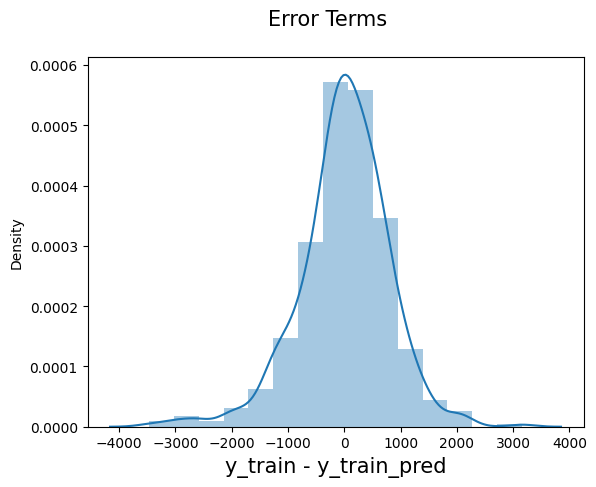

In [633]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [634]:
# From above chart you can see that the error terms are centered around zero.

In [646]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8311443094714426

In [635]:
num_vars = ['temp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [636]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [637]:
y_test = df_test.pop('cnt')
X_test = df_test

In [638]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [639]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_Jul', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [640]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [643]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [644]:
# Making predictions

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

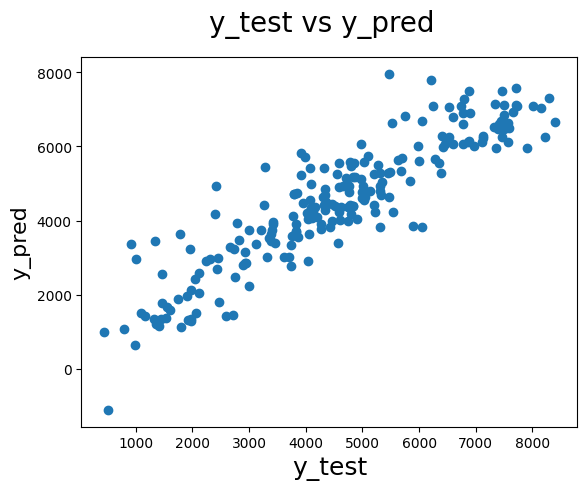

In [576]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [645]:
from sklearn.metrics import r2_score
y_test_pred = lm.predict(X_test_new) 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8099137099809726

In [649]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7819009935571158